<center>
    <img src="./images/msp_header.png">
</center>

#### Prof. Dr. -Ing. Gerald Schuller <br> Jupyter Notebook: Renato Profeta

# Windows

In [30]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/Dwkdlb5xYkM" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

How do we design Window functions to obtain higher stopband attenuation? There are 2 versions, for windows of **even** and **odd length**. We now analyse a few common window types.

Lets start again with the **rectangular window**.
$h(n)=1$, for n=0,...,L-1.<br>

In Python we get its frequency response for L=16: 

In [31]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/9P22klZI5_0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

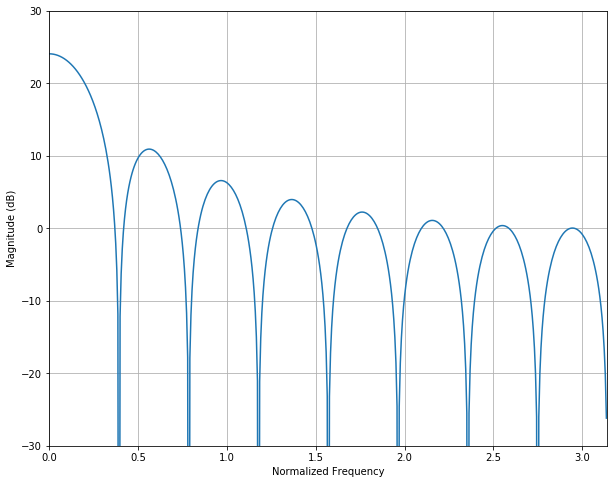

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

h=np.ones(16);
omega, H =signal.freqz(h)
plt.figure(figsize=(10,8))
plt.plot(omega, 20*np.log10(abs(H)+1e-6))
plt.axis([0, 3.14, -30, 30])
plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude (dB)')
plt.grid()

Observe: Its main lobe has a 3dB width of about $0.05 \pi \approx 0.16$, the side lobe attenuation is about -15 to -25 dB.<br>
We can design different windows, which de-emphasize a transition region from passband to stopband, and emphasize the stopband attenuation more than the passband attenuation.

This can be seen as minimizing a **weighted** squared error function, where the parts the we want to emphasize get a higher weight. 

In Python we can formulate an error function with a weighted squared error as follows, with pb, tb: number of frequency samples in the passband and transitionband, respectively,

In [25]:
import numpy as np
import scipy.signal as signal

def errfunc(h):
    numfreqsamples=512
    
    #desired passband:
    pb=int(numfreqsamples/4.0)
    #desired transition band:
    tb=int(numfreqsamples/8.0)
    
    w, H = signal.freqz(h,1,numfreqsamples)
    H_desired=np.concatenate((np.ones(pb),np.zeros(numfreqsamples-pb)))
    weights = np.concatenate((np.ones(pb),np.zeros(tb), 1000*np.ones(numfreqsamples-pb-tb)))
    err = np.sum(np.abs(H-H_desired)*weights)
    return err

#### View H Desired and Weights

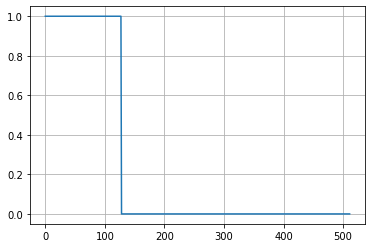

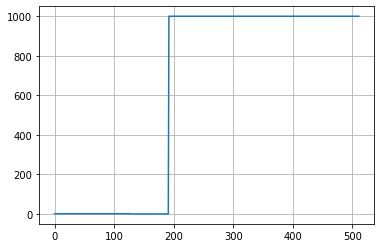

In [26]:
import matplotlib.pyplot as plt
import numpy as np

numfreqsamples=512
    
#desired passband:
pb=int(numfreqsamples/4.0)
#desired transition band:
tb=int(numfreqsamples/8.0)

# See H_Desired
plt.figure()
plt.plot(np.concatenate((np.ones(pb),np.zeros(numfreqsamples-pb))))
plt.grid()

plt.figure()
plt.plot(np.concatenate((np.ones(pb),np.zeros(tb), 1000*np.ones(numfreqsamples-pb-tb))))
plt.grid()

We can then apply optimization to obtain the window or filter samples which minimize this error, for instance using “scipy.optimize”. In this example a window or filter h (depending on how it is used) of length 16 samples or taps is obtained with:

In [32]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/aPt2sAmQbSg" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

In [27]:
import scipy.optimize as opt

minout=opt.minimize(errfunc,np.random.rand(16))
h=minout.x
print(h)


[-0.00028433 -0.0013443  -0.00396331 -0.00901458 -0.01664832 -0.02586522
 -0.0344325  -0.03971832 -0.03994815 -0.03504098 -0.02663534 -0.01727224
 -0.00929192 -0.00396101 -0.00124255 -0.0002329 ]


We get the samples or impulse response as:

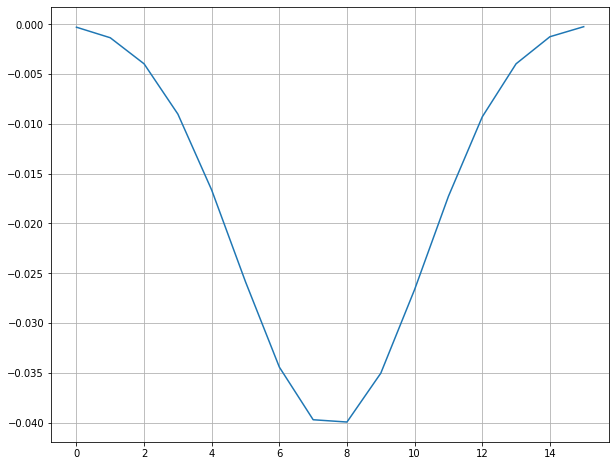

In [28]:
plt.figure(figsize=(10,8))
plt.plot(h)
plt.grid()

**Observe:** the negative sign doesn’t matter, because we only optimized for the magnitude. It magnitude of the frequency response is,

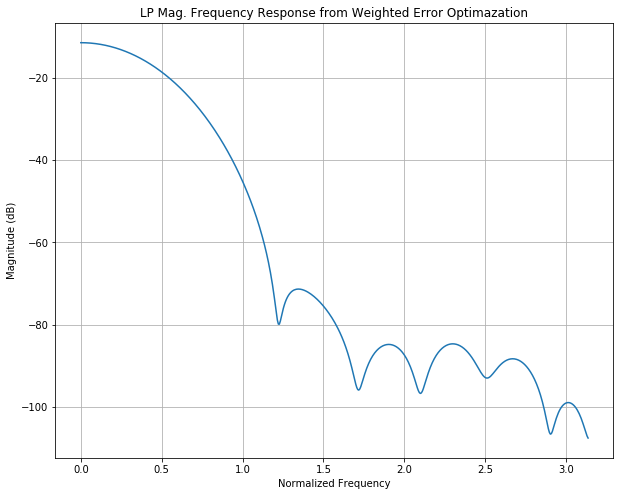

In [29]:
omega, H =signal.freqz(h)
plt.figure(figsize=(10,8))
plt.plot(omega, 20*np.log10(abs(H)+1e-6))
plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude (dB)')
plt.title('LP Mag. Frequency Response from Weighted Error Optimazation')
plt.grid()

Observe the decently high stopband attenuation of about -80 dB!

Usually this optimization gives the best answer for most applications. But there are also more **“pre-fabricated” windows** for filter design, with different trade-offs of transition band width and stopband attenuation, for convenience.

## Raise Cosine Window (Hann- or Hanning Window)

The first is the **raised cosine window**, also known as **Hann- or Hanning Window**:

$$\large
 {h ( n ) =0.5 - 0.5cos \left(  \frac{  2π}   {L}   ( n+0. 5 )  \right) } 
$$
,with n=0,…,L-1, for even window lengths.

An example of a raised cosine with even window length and L=16:  We obtain its plot with: 


In [33]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/Q6RBnDCcT4Y" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

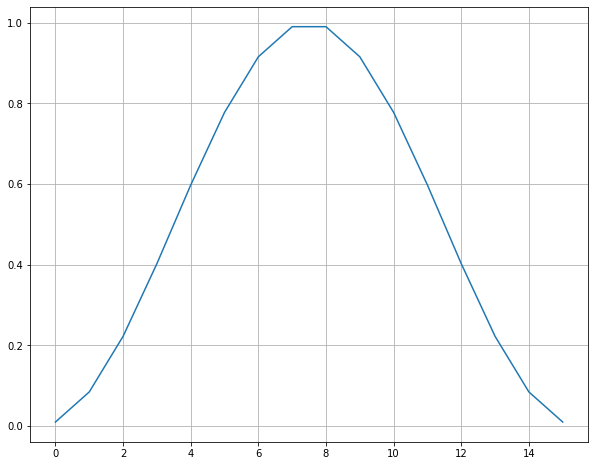

In [20]:
h=0.5-0.5*np.cos(2*np.pi/16*(np.arange(16)+0.5))

plt.figure(figsize=(10,8))
plt.plot(h)
plt.grid()

**Observe:** The center is between 2 samples!

Its frequency response is obtained with freqz:


In [34]:
def freqz(x):
    # get frequency bins and according magnitude values 
    f, H = signal.freqz(x)

    #normalized frequency
    fNorm = f/np.pi 

    # magnitude in dB
    hdB = 20 * np.log10(abs(H)+1e-5) #"+1e-5" avoids log10(0)!

    # open figure
    plt.figure(figsize=(10,8))

    plt.subplot(211)
    plt.title('Magnitude')
    plt.plot(f, hdB, 'b')
    plt.axis([0,3.14,np.min(hdB)-1,np.max(hdB)+1])
    plt.grid(True)
    plt.xlabel('Normalized Frequency (rad/sample)')
    plt.ylabel('Magnitude (dB)')

    plt.subplot(212)
    plt.title('Phase')
    angles = np.unwrap(np.angle(H))
    anglesGrad = (360 * angles)/(2*np.pi)
    plt.plot(f, anglesGrad, 'b')
    plt.axis([0,3.14,np.min(anglesGrad),np.max(anglesGrad)])
    plt.grid(True)
    plt.xlabel('Normalized Frequency (rad/sample)')
    plt.ylabel('Phase (degrees)')
    plt.tight_layout()

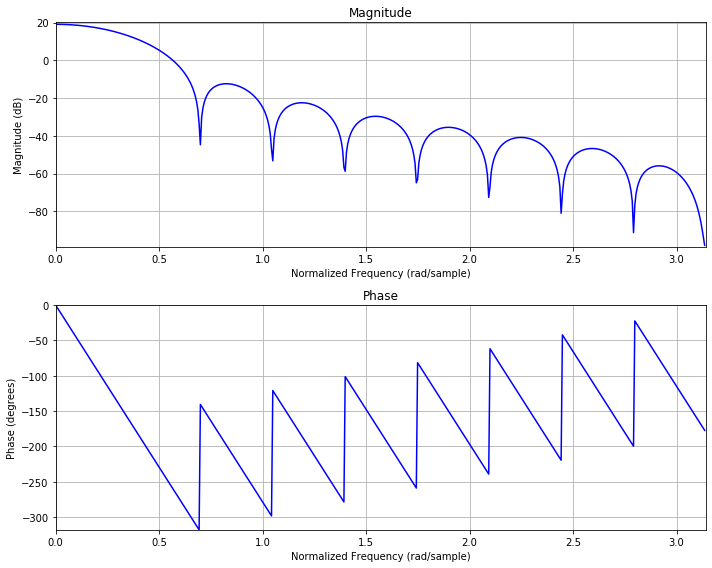

In [35]:
freqz(h)

Here we can see that we obtain also a much higher attenuation (in comparison to the rectangular function) for the first side lobe, at over -35 dB (measured from the maximum of the main lobe, the pass band), and far off in the stop band we get about -60 dB attenuation! 

But at the cost of a wider main lobe (its 3dB width is about $0.1\pi$, twice as wide as for the rectangular window), which leads to a wider transition band.

This shows a **general trade-off:** We can **trade transition width** for **stop-band attenuation.**

For odd window lengths we get:

$$\large
h(n)=0.5-0.5cos \left(\frac{2\pi}{L+1}(n+1)\right)$$
, with n=0,…,L-1.

Example for L=17 (number of samples of the impulse response, equal to the coefficients, since this represents an FIR filter):


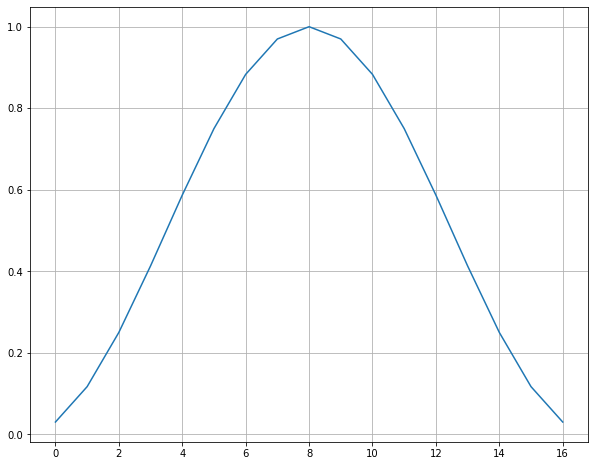

In [25]:
h=0.5-0.5*np.cos(2*np.pi/18*(np.arange(17)+1))

plt.figure(figsize=(10,8))
plt.plot(h)
plt.grid()

**Observe:** Here the center is right on one sample!

For the **Sine window** we get:

$$\large
h(n)=sin(\frac{\pi}{L}(n+0.5))$$

,with n=0,…,L-1 for even window lengths L, or

$$\large
h(n)=sin(\frac{\pi}{L+1}(n+1))
$$
,with n=0,…,L-1 for odd window length L.

Example for L=16:

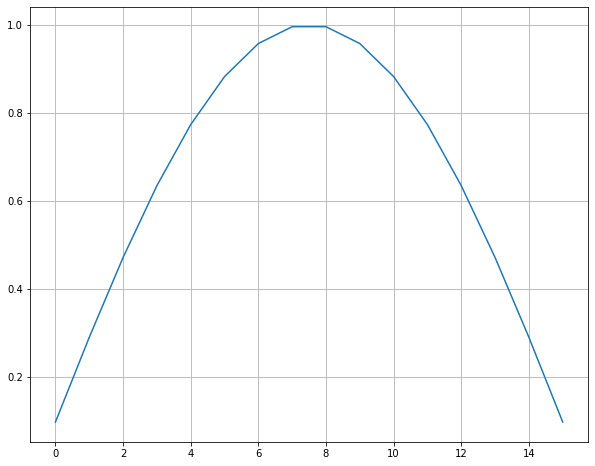

In [33]:
s=np.sin(np.pi/16*(np.arange(16)+0.5))

plt.figure(figsize=(10,8))
plt.plot(s)
plt.grid()

Its frequency response is:

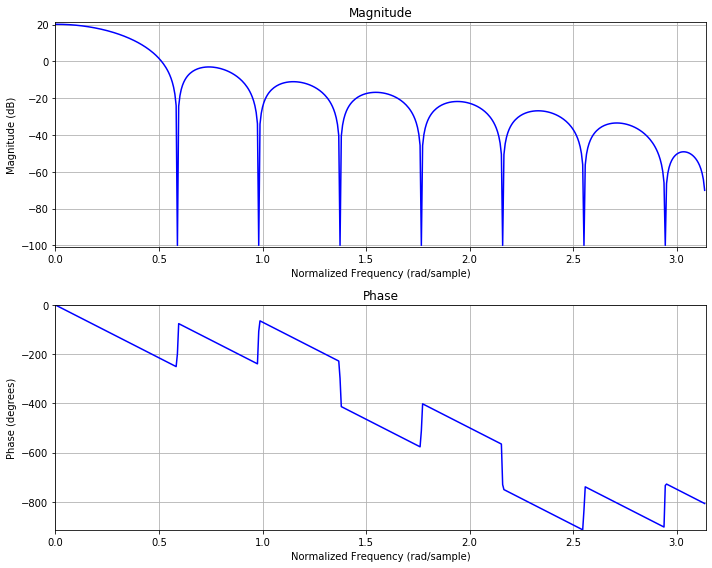

In [37]:
freqz(s)

Here we can see that the **main lobe is somewhat narrower** than for the raised cosine window, with a 3dB width of about $0.04\pi$, but the first side lobe has only about -20 dB attenuation. But the further side lobes increase in attenuation. This **attenuation** is more  than for the rectangular window, but **less than for the raised cosine window**. On the other hand, its transition bandwidth is less than for the raised cosine window.

Observe that this always results in positive values for the window functions, and that they are perfectly symmetric (for odd lengths there is a sample right at the center, for even length windows the center is right between 2 center samples).

## Kaiser Window

In [34]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/mGXQek43jUE" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

Well known is also the so-called **Kaiser Window:**

$$\large
h ( n ) = 0.5 \cdot  \dfrac{I _{0}\left (β \sqrt {1 -  \left( \frac  {2n}   {L}   \right) ^{2} }   \right )}{I _{0}( β )}  
$$
, for $\mid n \mid \leq L/2$

(a non-causal representation) where the Bessel function is used,

$$\large
 {I_{0}   ( x ) =1+ \sum _ { k=1}   ^ { { \infty } }  { \left [ {  \frac{ ( 0.5x ) ^ {{2} } k}   {k!} }  \right ]}  ^ {{2} } } 
$$

where in practical designs often the first 20 terms are used (Strang, Nguyen, “Wavelets and Filter Banks”). The parameter $\beta$ is used to **trade off the transition bandwidth of the filter and its stopband attenuation.**

Example for L=16 and $\beta=2$, with iPython:

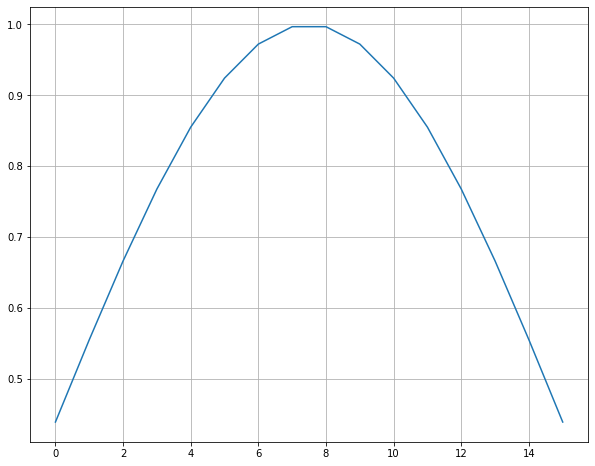

In [39]:
hk=np.kaiser(16,2)

plt.figure(figsize=(10,8))
plt.plot(hk)
plt.grid()

We obtain its frequency response with:

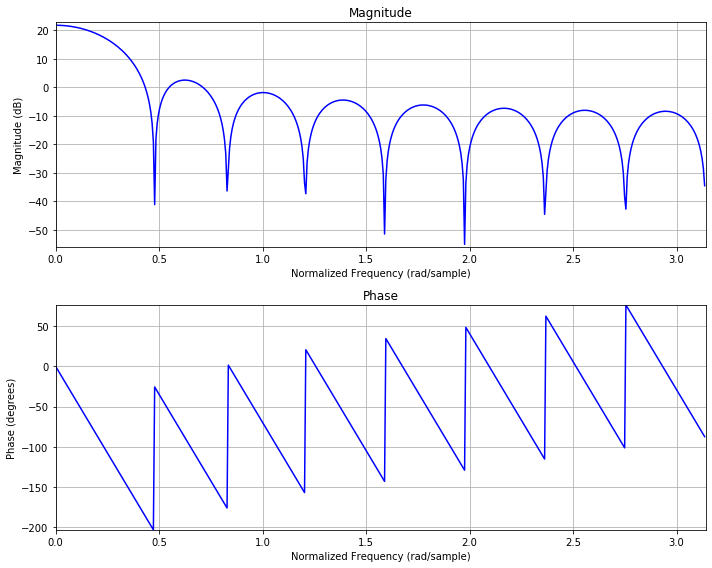

In [40]:
freqz(hk)

Here we can see that the main lobe (pass band and transition band), for this $\beta$, is even narrower than for the sine window, the first side lobe also has about -20 dB attenuation, but the further side lobes don't have much increasing attenuation.

For $\beta=8$ we obtain:

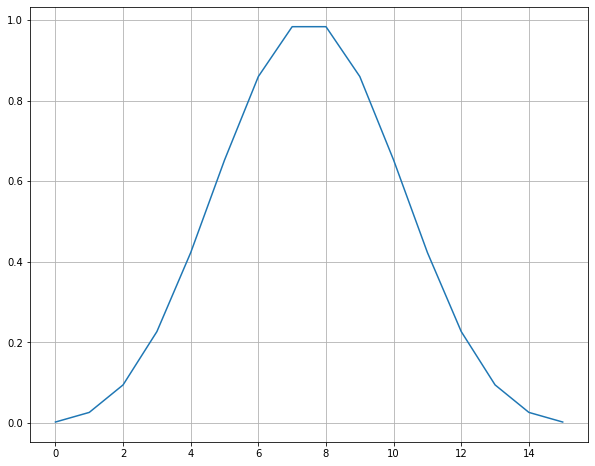

In [41]:
hk=np.kaiser(16,8)

plt.figure(figsize=(10,8))
plt.plot(hk)
plt.grid()

And for the frequency response we get:


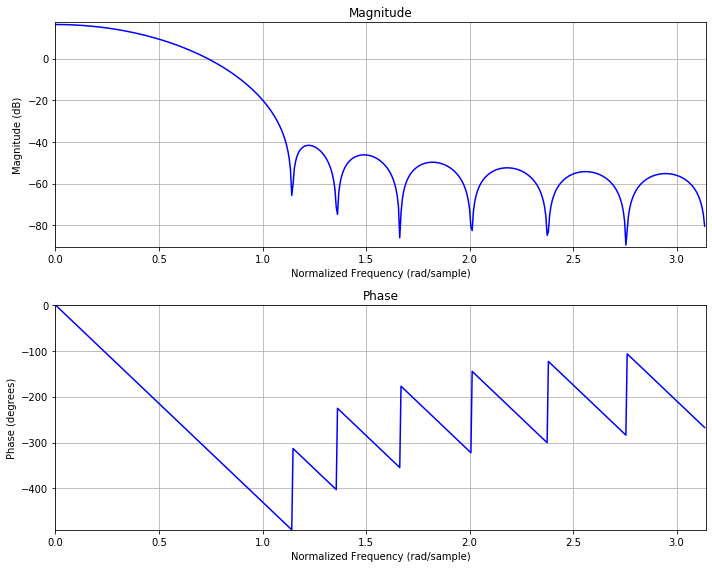

In [42]:
freqz(hk)

Here we can now see the other extreme, with a very wide main lobe (pass and transition band), but a first side lobe with already about -60 dB attenuation, which would fulfill our requirements!

## Vorbis

In [35]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/rsTDGbMYQPM" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

In [48]:
%%html
<iframe src="https://xiph.org/vorbis/doc/Vorbis_I_spec.pdf" width='900' height='400' />

An interesting window is also

$$\large
{h ( n ) =sin \left ( {  \frac{π}  {2} } sin \left ( {  \frac{π}    {L} }  ( n+0 .5 )  \right ) ^ { {2} }  \right )} 
$$, n=0,…,L-1
 (from:http://xiph.org/vorbis/doc/Vorbis_I_spec.pdf).

For L=16 we get:


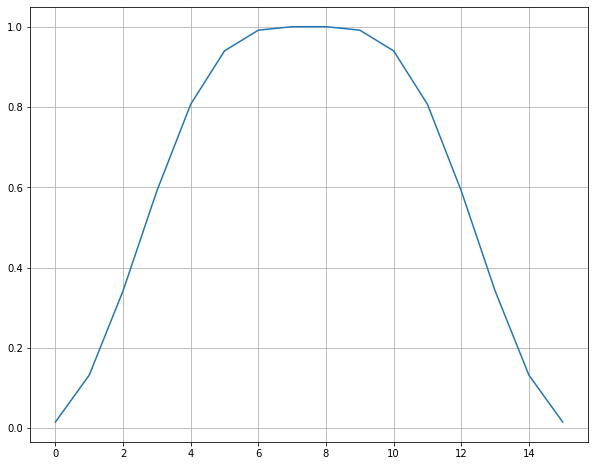

In [49]:
sq=np.sin(np.pi/2*(np.sin(np.pi/16*(np.arange(16)+0.5))**2))

plt.figure(figsize=(10,8))
plt.plot(sq)
plt.grid()

Its frequency response is:

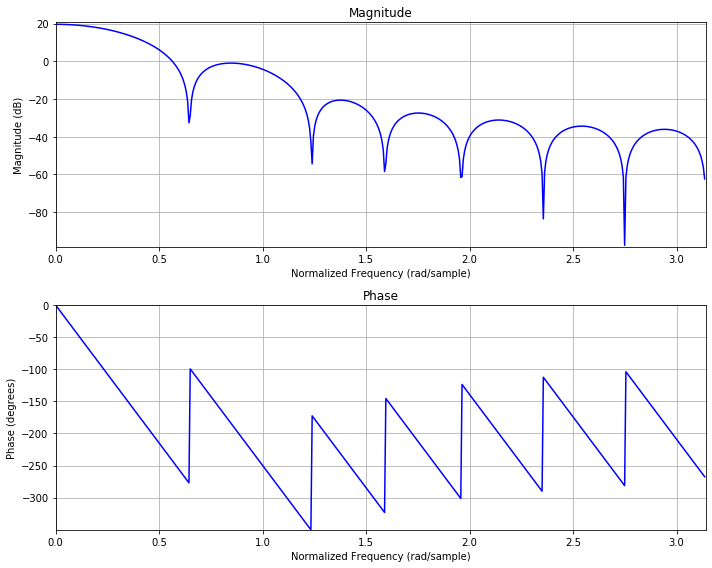

In [50]:
freqz(sq)

Here we can see that the main lobe is wider than for the sine window, the first side lobe also has about -20 dB stop band attenuation, but the further side lobes increase their attenuation more than for the sine window.

It results in a good stopband attenuation, but is lacking the additional parameter we saw with the Kaiser window.

The MPEG AAC audio coder also uses an optimized window function, the so-called **Kaiser-Bessel Derived (KBD)** window, which results from **numerical optimization.**
